# To Classify the health of a fetus as Normal, Suspect or Pathological using CTG data
Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


**IMPORTING OF IMPORTANT LIBRARIES**

In [2]:
!pip install tensorflow 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

**LOAD DATASET**

In [3]:
dataset=pd.read_csv('../input/fetal-health-classification/fetal_health.csv')
dataset

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


**CHECK FOR NULL VALUES**

In [4]:
dataset.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

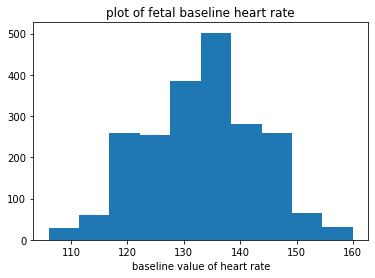

In [5]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(dataset['baseline value'])
plt.title('plot of fetal baseline heart rate')
plt.xlabel('baseline value of heart rate')
plt.show()

In [6]:
dataset['prolongued_decelerations'].unique()

array([0.   , 0.002, 0.003, 0.001, 0.004, 0.005])

**BASIC STATISTICS OF DATASET FEATURES**

In [7]:
a=dataset.describe()
dataset_stats=a.transpose()
dataset_stats

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [8]:
label=dataset['fetal_health']
label

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

**SINCE THE FEATURES ARE IN DIFFERENT SCALES, WE NORMALIZE THE DATA USING Z-SCORE NORMALIZATION**

In [9]:
def norm(x):
    return(x-dataset_stats['mean'])/dataset_stats['std']
normed_data=norm(dataset)
normed_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-1.351902,-0.822195,-0.203162,-1.482116,-0.638287,-0.057462,-0.268691,1.512834,-0.942873,1.802118,...,-1.068311,-2.119093,-0.701232,-0.458336,-1.065363,0.153234,-1.181364,1.870129,1.112718,1.132322
1,-0.132494,0.729961,-0.203162,0.554496,0.375155,-0.057462,-0.268691,-1.744341,0.868636,-0.535235,...,-0.865335,1.893349,0.654983,0.957976,0.216587,0.089105,0.132007,-0.234943,-0.524402,-0.495343
2,-0.030877,-0.046117,-0.203162,1.233367,0.375155,-0.057462,-0.268691,-1.802504,0.868636,-0.535235,...,-0.865335,1.893349,0.315929,0.957976,0.216587,0.024976,-0.006243,-0.200434,-0.524402,-0.495343
3,0.070740,-0.046117,-0.203162,1.233367,0.375155,-0.057462,-0.268691,-1.802504,1.208294,-0.535235,...,-1.372774,0.332955,2.350251,-0.458336,-0.027594,-0.039153,-0.075367,-0.200434,1.112718,-0.495343
4,-0.132494,0.988654,-0.203162,1.233367,-0.638287,-0.057462,-0.268691,-1.802504,1.208294,-0.535235,...,-1.372774,0.332955,1.672144,-0.458336,-0.027594,0.089105,-0.006243,-0.269452,1.112718,-0.495343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680444,-0.822195,-0.203162,0.893932,-0.638287,-0.057462,-0.268691,1.861817,-1.282531,0.823691,...,1.468883,0.723053,-0.023125,-0.458336,0.949130,0.986909,0.961504,-0.580037,-0.524402,1.132322
2122,0.680444,-0.563502,-0.203162,0.893932,-0.638287,-0.057462,-0.268691,1.803653,-1.056093,0.660620,...,0.318689,0.277226,0.654983,-0.458336,0.888085,0.858651,0.892380,-0.545527,1.112718,1.132322
2123,0.680444,-0.563502,-0.203162,0.893932,-0.638287,-0.057462,-0.268691,1.861817,-1.056093,0.551906,...,0.318689,0.332955,0.315929,-0.458336,0.949130,0.858651,0.961504,-0.511018,1.112718,1.132322
2124,0.680444,-0.563502,-0.203162,0.554496,-0.638287,-0.057462,-0.268691,1.803653,-1.056093,0.932405,...,0.318689,0.277226,0.654983,-0.458336,0.888085,0.794523,0.892380,-0.511018,1.112718,1.132322


In [10]:
features=normed_data.drop(columns='fetal_health')
features

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.351902,-0.822195,-0.203162,-1.482116,-0.638287,-0.057462,-0.268691,1.512834,-0.942873,1.802118,...,-0.165468,-1.068311,-2.119093,-0.701232,-0.458336,-1.065363,0.153234,-1.181364,1.870129,1.112718
1,-0.132494,0.729961,-0.203162,0.554496,0.375155,-0.057462,-0.268691,-1.744341,0.868636,-0.535235,...,1.528765,-0.865335,1.893349,0.654983,0.957976,0.216587,0.089105,0.132007,-0.234943,-0.524402
2,-0.030877,-0.046117,-0.203162,1.233367,0.375155,-0.057462,-0.268691,-1.802504,0.868636,-0.535235,...,1.528765,-0.865335,1.893349,0.315929,0.957976,0.216587,0.024976,-0.006243,-0.200434,-0.524402
3,0.070740,-0.046117,-0.203162,1.233367,0.375155,-0.057462,-0.268691,-1.802504,1.208294,-0.535235,...,1.195052,-1.372774,0.332955,2.350251,-0.458336,-0.027594,-0.039153,-0.075367,-0.200434,1.112718
4,-0.132494,0.988654,-0.203162,1.233367,-0.638287,-0.057462,-0.268691,-1.802504,1.208294,-0.535235,...,1.195052,-1.372774,0.332955,1.672144,-0.458336,-0.027594,0.089105,-0.006243,-0.269452,1.112718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680444,-0.822195,-0.203162,0.893932,-0.638287,-0.057462,-0.268691,1.861817,-1.282531,0.823691,...,-0.781552,1.468883,0.723053,-0.023125,-0.458336,0.949130,0.986909,0.961504,-0.580037,-0.524402
2122,0.680444,-0.563502,-0.203162,0.893932,-0.638287,-0.057462,-0.268691,1.803653,-1.056093,0.660620,...,-0.114127,0.318689,0.277226,0.654983,-0.458336,0.888085,0.858651,0.892380,-0.545527,1.112718
2123,0.680444,-0.563502,-0.203162,0.893932,-0.638287,-0.057462,-0.268691,1.861817,-1.056093,0.551906,...,-0.088457,0.318689,0.332955,0.315929,-0.458336,0.949130,0.858651,0.961504,-0.511018,1.112718
2124,0.680444,-0.563502,-0.203162,0.554496,-0.638287,-0.057462,-0.268691,1.803653,-1.056093,0.932405,...,-0.114127,0.318689,0.277226,0.654983,-0.458336,0.888085,0.794523,0.892380,-0.511018,1.112718


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,label, test_size=0.3)

# BUILD NN 
**BUILD A NEURAL NETWORK WITH TWO HIDDEN LAYERS WITH RELU ACTIVATION FUNCTION AND OUTPUT LAYER WITH SOFTMAX ACTIVATION FUNCTION. LOSS FUNCTION USED HERE ID SPARSE CATEGORICAL CROSS ENTROPY**

In [12]:
def build_model():
    model=keras.Sequential([layers.Dense(8, activation='relu'),
                                                 layers.Dense(6, activation='relu'),layers.Dropout(0.2),
                            layers.Dense(4, activation='softmax')])
    optimizer=tf.keras.optimizers.Adam(0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [13]:
model=build_model()

# TRAIN THE MODEL

In [15]:
history=model.fit(x_train,y_train, epochs=2000)

Epoch 1/2000
47/47 [==============================] - 0s 883us/step - loss: 1.2587 - accuracy: 0.5934
Epoch 2/2000
47/47 [==============================] - 0s 818us/step - loss: 1.0593 - accuracy: 0.7278
Epoch 3/2000
47/47 [==============================] - 0s 821us/step - loss: 0.8633 - accuracy: 0.7614
Epoch 4/2000
47/47 [==============================] - 0s 834us/step - loss: 0.7215 - accuracy: 0.7668
Epoch 5/2000
47/47 [==============================] - 0s 830us/step - loss: 0.6374 - accuracy: 0.7668
Epoch 6/2000
47/47 [==============================] - 0s 815us/step - loss: 0.5842 - accuracy: 0.7695
Epoch 7/2000
47/47 [==============================] - 0s 865us/step - loss: 0.5434 - accuracy: 0.7695
Epoch 8/2000
47/47 [==============================] - 0s 866us/step - loss: 0.5136 - accuracy: 0.7695
Epoch 9/2000
47/47 [==============================] - 0s 847us/step - loss: 0.4952 - accuracy: 0.7702
Epoch 10/2000
47/47 [==============================] - 0s 819us/step - loss: 0.476

47/47 [==============================] - 0s 891us/step - loss: 0.2192 - accuracy: 0.9039
Epoch 81/2000
47/47 [==============================] - 0s 901us/step - loss: 0.2122 - accuracy: 0.9147
Epoch 82/2000
47/47 [==============================] - 0s 881us/step - loss: 0.2228 - accuracy: 0.9066
Epoch 83/2000
47/47 [==============================] - 0s 919us/step - loss: 0.2130 - accuracy: 0.9153
Epoch 84/2000
47/47 [==============================] - 0s 917us/step - loss: 0.2293 - accuracy: 0.9026
Epoch 85/2000
47/47 [==============================] - 0s 883us/step - loss: 0.2175 - accuracy: 0.9046
Epoch 86/2000
47/47 [==============================] - 0s 890us/step - loss: 0.2130 - accuracy: 0.9113
Epoch 87/2000
47/47 [==============================] - 0s 885us/step - loss: 0.2212 - accuracy: 0.9079
Epoch 88/2000
47/47 [==============================] - 0s 891us/step - loss: 0.2150 - accuracy: 0.9093
Epoch 89/2000
47/47 [==============================] - 0s 895us/step - loss: 0.2258 - a

47/47 [==============================] - 0s 873us/step - loss: 0.1812 - accuracy: 0.9113
Epoch 160/2000
47/47 [==============================] - 0s 909us/step - loss: 0.1836 - accuracy: 0.9247
Epoch 161/2000
47/47 [==============================] - 0s 891us/step - loss: 0.1864 - accuracy: 0.9180
Epoch 162/2000
47/47 [==============================] - 0s 904us/step - loss: 0.1840 - accuracy: 0.9187
Epoch 163/2000
47/47 [==============================] - 0s 888us/step - loss: 0.1760 - accuracy: 0.9241
Epoch 164/2000
47/47 [==============================] - 0s 891us/step - loss: 0.1791 - accuracy: 0.9254
Epoch 165/2000
47/47 [==============================] - 0s 873us/step - loss: 0.1853 - accuracy: 0.9167
Epoch 166/2000
47/47 [==============================] - 0s 901us/step - loss: 0.1835 - accuracy: 0.9234
Epoch 167/2000
47/47 [==============================] - 0s 903us/step - loss: 0.1727 - accuracy: 0.9261
Epoch 168/2000
47/47 [==============================] - 0s 877us/step - loss: 0

Epoch 238/2000
47/47 [==============================] - 0s 895us/step - loss: 0.1681 - accuracy: 0.9220
Epoch 239/2000
47/47 [==============================] - 0s 879us/step - loss: 0.1716 - accuracy: 0.9227
Epoch 240/2000
47/47 [==============================] - 0s 909us/step - loss: 0.1678 - accuracy: 0.9267
Epoch 241/2000
47/47 [==============================] - 0s 876us/step - loss: 0.1643 - accuracy: 0.9241
Epoch 242/2000
47/47 [==============================] - 0s 919us/step - loss: 0.1633 - accuracy: 0.9261
Epoch 243/2000
47/47 [==============================] - 0s 876us/step - loss: 0.1728 - accuracy: 0.9220
Epoch 244/2000
47/47 [==============================] - 0s 883us/step - loss: 0.1614 - accuracy: 0.9261
Epoch 245/2000
47/47 [==============================] - 0s 885us/step - loss: 0.1666 - accuracy: 0.9261
Epoch 246/2000
47/47 [==============================] - 0s 855us/step - loss: 0.1715 - accuracy: 0.9220
Epoch 247/2000
47/47 [==============================] - 0s 883us

47/47 [==============================] - 0s 880us/step - loss: 0.1613 - accuracy: 0.9254
Epoch 317/2000
47/47 [==============================] - 0s 964us/step - loss: 0.1544 - accuracy: 0.9294
Epoch 318/2000
47/47 [==============================] - 0s 885us/step - loss: 0.1485 - accuracy: 0.9267
Epoch 319/2000
47/47 [==============================] - 0s 900us/step - loss: 0.1588 - accuracy: 0.9234
Epoch 320/2000
47/47 [==============================] - 0s 901us/step - loss: 0.1621 - accuracy: 0.9241
Epoch 321/2000
47/47 [==============================] - 0s 872us/step - loss: 0.1618 - accuracy: 0.9261
Epoch 322/2000
47/47 [==============================] - 0s 871us/step - loss: 0.1572 - accuracy: 0.9247
Epoch 323/2000
47/47 [==============================] - 0s 934us/step - loss: 0.1561 - accuracy: 0.9214
Epoch 324/2000
47/47 [==============================] - 0s 957us/step - loss: 0.1533 - accuracy: 0.9301
Epoch 325/2000
47/47 [==============================] - 0s 950us/step - loss: 0

Epoch 395/2000
47/47 [==============================] - 0s 892us/step - loss: 0.1518 - accuracy: 0.9274
Epoch 396/2000
47/47 [==============================] - 0s 835us/step - loss: 0.1505 - accuracy: 0.9328
Epoch 397/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9348
Epoch 398/2000
47/47 [==============================] - 0s 942us/step - loss: 0.1512 - accuracy: 0.9335
Epoch 399/2000
47/47 [==============================] - 0s 890us/step - loss: 0.1461 - accuracy: 0.9288
Epoch 400/2000
47/47 [==============================] - 0s 928us/step - loss: 0.1443 - accuracy: 0.9355
Epoch 401/2000
47/47 [==============================] - 0s 903us/step - loss: 0.1506 - accuracy: 0.9335
Epoch 402/2000
47/47 [==============================] - 0s 898us/step - loss: 0.1498 - accuracy: 0.9294
Epoch 403/2000
47/47 [==============================] - 0s 913us/step - loss: 0.1502 - accuracy: 0.9308
Epoch 404/2000
47/47 [==============================] - 0s 916us/s

47/47 [==============================] - 0s 885us/step - loss: 0.1467 - accuracy: 0.9355
Epoch 474/2000
47/47 [==============================] - 0s 916us/step - loss: 0.1466 - accuracy: 0.9341
Epoch 475/2000
47/47 [==============================] - 0s 923us/step - loss: 0.1554 - accuracy: 0.9274
Epoch 476/2000
47/47 [==============================] - 0s 873us/step - loss: 0.1472 - accuracy: 0.9341
Epoch 477/2000
47/47 [==============================] - 0s 885us/step - loss: 0.1429 - accuracy: 0.9368
Epoch 478/2000
47/47 [==============================] - 0s 934us/step - loss: 0.1478 - accuracy: 0.9355
Epoch 479/2000
47/47 [==============================] - 0s 915us/step - loss: 0.1592 - accuracy: 0.9281
Epoch 480/2000
47/47 [==============================] - 0s 914us/step - loss: 0.1378 - accuracy: 0.9395
Epoch 481/2000
47/47 [==============================] - 0s 910us/step - loss: 0.1416 - accuracy: 0.9355
Epoch 482/2000
47/47 [==============================] - 0s 891us/step - loss: 0

Epoch 552/2000
47/47 [==============================] - 0s 928us/step - loss: 0.1387 - accuracy: 0.9382
Epoch 553/2000
47/47 [==============================] - 0s 902us/step - loss: 0.1339 - accuracy: 0.9368
Epoch 554/2000
47/47 [==============================] - 0s 923us/step - loss: 0.1473 - accuracy: 0.9348
Epoch 555/2000
47/47 [==============================] - 0s 880us/step - loss: 0.1529 - accuracy: 0.9321
Epoch 556/2000
47/47 [==============================] - 0s 857us/step - loss: 0.1455 - accuracy: 0.9328
Epoch 557/2000
47/47 [==============================] - 0s 896us/step - loss: 0.1446 - accuracy: 0.9402
Epoch 558/2000
47/47 [==============================] - 0s 866us/step - loss: 0.1482 - accuracy: 0.9348
Epoch 559/2000
47/47 [==============================] - 0s 877us/step - loss: 0.1425 - accuracy: 0.9335
Epoch 560/2000
47/47 [==============================] - 0s 870us/step - loss: 0.1398 - accuracy: 0.9422
Epoch 561/2000
47/47 [==============================] - 0s 892us

47/47 [==============================] - 0s 915us/step - loss: 0.1340 - accuracy: 0.9435
Epoch 631/2000
47/47 [==============================] - 0s 917us/step - loss: 0.1362 - accuracy: 0.9435
Epoch 632/2000
47/47 [==============================] - 0s 898us/step - loss: 0.1329 - accuracy: 0.9456
Epoch 633/2000
47/47 [==============================] - 0s 888us/step - loss: 0.1422 - accuracy: 0.9375
Epoch 634/2000
47/47 [==============================] - 0s 995us/step - loss: 0.1358 - accuracy: 0.9395
Epoch 635/2000
47/47 [==============================] - 0s 896us/step - loss: 0.1398 - accuracy: 0.9395
Epoch 636/2000
47/47 [==============================] - 0s 876us/step - loss: 0.1420 - accuracy: 0.9328
Epoch 637/2000
47/47 [==============================] - 0s 913us/step - loss: 0.1408 - accuracy: 0.9368
Epoch 638/2000
47/47 [==============================] - 0s 920us/step - loss: 0.1392 - accuracy: 0.9388
Epoch 639/2000
47/47 [==============================] - 0s 919us/step - loss: 0

47/47 [==============================] - 0s 909us/step - loss: 0.1341 - accuracy: 0.9375
Epoch 710/2000
47/47 [==============================] - 0s 853us/step - loss: 0.1434 - accuracy: 0.9355
Epoch 711/2000
47/47 [==============================] - 0s 895us/step - loss: 0.1363 - accuracy: 0.9395
Epoch 712/2000
47/47 [==============================] - 0s 878us/step - loss: 0.1366 - accuracy: 0.9409
Epoch 713/2000
47/47 [==============================] - 0s 873us/step - loss: 0.1347 - accuracy: 0.9449
Epoch 714/2000
47/47 [==============================] - 0s 881us/step - loss: 0.1370 - accuracy: 0.9422
Epoch 715/2000
47/47 [==============================] - 0s 901us/step - loss: 0.1328 - accuracy: 0.9388
Epoch 716/2000
47/47 [==============================] - 0s 895us/step - loss: 0.1398 - accuracy: 0.9409
Epoch 717/2000
47/47 [==============================] - 0s 886us/step - loss: 0.1290 - accuracy: 0.9402
Epoch 718/2000
47/47 [==============================] - 0s 890us/step - loss: 0

47/47 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.9402
Epoch 789/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.9402
Epoch 790/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1356 - accuracy: 0.9388
Epoch 791/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.9422
Epoch 792/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9409
Epoch 793/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1322 - accuracy: 0.9429
Epoch 794/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9456
Epoch 795/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.9469
Epoch 796/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.9382
Epoch 797/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1364 - accuracy: 0.

47/47 [==============================] - 0s 872us/step - loss: 0.1350 - accuracy: 0.9435
Epoch 869/2000
47/47 [==============================] - 0s 883us/step - loss: 0.1253 - accuracy: 0.9496
Epoch 870/2000
47/47 [==============================] - 0s 900us/step - loss: 0.1259 - accuracy: 0.9415
Epoch 871/2000
47/47 [==============================] - 0s 964us/step - loss: 0.1225 - accuracy: 0.9516
Epoch 872/2000
47/47 [==============================] - 0s 916us/step - loss: 0.1266 - accuracy: 0.9462
Epoch 873/2000
47/47 [==============================] - 0s 906us/step - loss: 0.1192 - accuracy: 0.9462
Epoch 874/2000
47/47 [==============================] - 0s 910us/step - loss: 0.1349 - accuracy: 0.9368
Epoch 875/2000
47/47 [==============================] - 0s 896us/step - loss: 0.1337 - accuracy: 0.9395
Epoch 876/2000
47/47 [==============================] - 0s 898us/step - loss: 0.1313 - accuracy: 0.9435
Epoch 877/2000
47/47 [==============================] - 0s 897us/step - loss: 0

Epoch 947/2000
47/47 [==============================] - 0s 896us/step - loss: 0.1283 - accuracy: 0.9382
Epoch 948/2000
47/47 [==============================] - 0s 907us/step - loss: 0.1271 - accuracy: 0.9483
Epoch 949/2000
47/47 [==============================] - 0s 933us/step - loss: 0.1274 - accuracy: 0.9456
Epoch 950/2000
47/47 [==============================] - 0s 914us/step - loss: 0.1321 - accuracy: 0.9402
Epoch 951/2000
47/47 [==============================] - 0s 868us/step - loss: 0.1308 - accuracy: 0.9422
Epoch 952/2000
47/47 [==============================] - 0s 919us/step - loss: 0.1399 - accuracy: 0.9341
Epoch 953/2000
47/47 [==============================] - 0s 892us/step - loss: 0.1233 - accuracy: 0.9442
Epoch 954/2000
47/47 [==============================] - 0s 896us/step - loss: 0.1289 - accuracy: 0.9435
Epoch 955/2000
47/47 [==============================] - 0s 899us/step - loss: 0.1340 - accuracy: 0.9382
Epoch 956/2000
47/47 [==============================] - 0s 910us

47/47 [==============================] - 0s 850us/step - loss: 0.1280 - accuracy: 0.9415
Epoch 1026/2000
47/47 [==============================] - 0s 893us/step - loss: 0.1291 - accuracy: 0.9469
Epoch 1027/2000
47/47 [==============================] - 0s 895us/step - loss: 0.1163 - accuracy: 0.9476
Epoch 1028/2000
47/47 [==============================] - 0s 878us/step - loss: 0.1200 - accuracy: 0.9462
Epoch 1029/2000
47/47 [==============================] - 0s 877us/step - loss: 0.1214 - accuracy: 0.9476
Epoch 1030/2000
47/47 [==============================] - 0s 873us/step - loss: 0.1230 - accuracy: 0.9462
Epoch 1031/2000
47/47 [==============================] - 0s 856us/step - loss: 0.1197 - accuracy: 0.9523
Epoch 1032/2000
47/47 [==============================] - 0s 902us/step - loss: 0.1283 - accuracy: 0.9442
Epoch 1033/2000
47/47 [==============================] - 0s 881us/step - loss: 0.1278 - accuracy: 0.9449
Epoch 1034/2000
47/47 [==============================] - 0s 886us/step 

47/47 [==============================] - 0s 869us/step - loss: 0.1278 - accuracy: 0.9422
Epoch 1104/2000
47/47 [==============================] - 0s 903us/step - loss: 0.1203 - accuracy: 0.9483
Epoch 1105/2000
47/47 [==============================] - 0s 886us/step - loss: 0.1342 - accuracy: 0.9415
Epoch 1106/2000
47/47 [==============================] - 0s 895us/step - loss: 0.1174 - accuracy: 0.9509
Epoch 1107/2000
47/47 [==============================] - 0s 885us/step - loss: 0.1168 - accuracy: 0.9476
Epoch 1108/2000
47/47 [==============================] - 0s 892us/step - loss: 0.1195 - accuracy: 0.9483
Epoch 1109/2000
47/47 [==============================] - 0s 897us/step - loss: 0.1281 - accuracy: 0.9362
Epoch 1110/2000
47/47 [==============================] - 0s 892us/step - loss: 0.1303 - accuracy: 0.9415
Epoch 1111/2000
47/47 [==============================] - 0s 936us/step - loss: 0.1342 - accuracy: 0.9355
Epoch 1112/2000
47/47 [==============================] - 0s 888us/step 

47/47 [==============================] - 0s 905us/step - loss: 0.1242 - accuracy: 0.9449
Epoch 1182/2000
47/47 [==============================] - 0s 854us/step - loss: 0.1191 - accuracy: 0.9476
Epoch 1183/2000
47/47 [==============================] - 0s 861us/step - loss: 0.1169 - accuracy: 0.9509
Epoch 1184/2000
47/47 [==============================] - 0s 856us/step - loss: 0.1172 - accuracy: 0.9509
Epoch 1185/2000
47/47 [==============================] - 0s 872us/step - loss: 0.1215 - accuracy: 0.9509
Epoch 1186/2000
47/47 [==============================] - 0s 876us/step - loss: 0.1293 - accuracy: 0.9483
Epoch 1187/2000
47/47 [==============================] - 0s 881us/step - loss: 0.1191 - accuracy: 0.9476
Epoch 1188/2000
47/47 [==============================] - 0s 896us/step - loss: 0.1303 - accuracy: 0.9435
Epoch 1189/2000
47/47 [==============================] - 0s 894us/step - loss: 0.1202 - accuracy: 0.9449
Epoch 1190/2000
47/47 [==============================] - 0s 855us/step 

47/47 [==============================] - 0s 937us/step - loss: 0.1157 - accuracy: 0.9462
Epoch 1260/2000
47/47 [==============================] - 0s 877us/step - loss: 0.1233 - accuracy: 0.9456
Epoch 1261/2000
47/47 [==============================] - 0s 878us/step - loss: 0.1188 - accuracy: 0.9509
Epoch 1262/2000
47/47 [==============================] - 0s 855us/step - loss: 0.1204 - accuracy: 0.9516
Epoch 1263/2000
47/47 [==============================] - 0s 913us/step - loss: 0.1257 - accuracy: 0.9449
Epoch 1264/2000
47/47 [==============================] - 0s 898us/step - loss: 0.1268 - accuracy: 0.9442
Epoch 1265/2000
47/47 [==============================] - 0s 868us/step - loss: 0.1149 - accuracy: 0.9503
Epoch 1266/2000
47/47 [==============================] - 0s 865us/step - loss: 0.1194 - accuracy: 0.9496
Epoch 1267/2000
47/47 [==============================] - 0s 870us/step - loss: 0.1268 - accuracy: 0.9496
Epoch 1268/2000
47/47 [==============================] - 0s 913us/step 

47/47 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9429
Epoch 1338/2000
47/47 [==============================] - 0s 829us/step - loss: 0.1216 - accuracy: 0.9476
Epoch 1339/2000
47/47 [==============================] - 0s 947us/step - loss: 0.1204 - accuracy: 0.9442
Epoch 1340/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 0.9550
Epoch 1341/2000
47/47 [==============================] - 0s 984us/step - loss: 0.1176 - accuracy: 0.9496
Epoch 1342/2000
47/47 [==============================] - 0s 972us/step - loss: 0.1194 - accuracy: 0.9462
Epoch 1343/2000
47/47 [==============================] - 0s 877us/step - loss: 0.1202 - accuracy: 0.9422
Epoch 1344/2000
47/47 [==============================] - 0s 930us/step - loss: 0.1261 - accuracy: 0.9496
Epoch 1345/2000
47/47 [==============================] - 0s 960us/step - loss: 0.1147 - accuracy: 0.9556
Epoch 1346/2000
47/47 [==============================] - 0s 826us/step - lo

47/47 [==============================] - 0s 886us/step - loss: 0.1089 - accuracy: 0.9516
Epoch 1416/2000
47/47 [==============================] - 0s 882us/step - loss: 0.1189 - accuracy: 0.9462
Epoch 1417/2000
47/47 [==============================] - 0s 871us/step - loss: 0.1242 - accuracy: 0.9449
Epoch 1418/2000
47/47 [==============================] - 0s 882us/step - loss: 0.1231 - accuracy: 0.9503
Epoch 1419/2000
47/47 [==============================] - 0s 913us/step - loss: 0.1125 - accuracy: 0.9496
Epoch 1420/2000
47/47 [==============================] - 0s 901us/step - loss: 0.1176 - accuracy: 0.9509
Epoch 1421/2000
47/47 [==============================] - 0s 877us/step - loss: 0.1237 - accuracy: 0.9415
Epoch 1422/2000
47/47 [==============================] - 0s 879us/step - loss: 0.1200 - accuracy: 0.9523
Epoch 1423/2000
47/47 [==============================] - 0s 868us/step - loss: 0.1119 - accuracy: 0.9516
Epoch 1424/2000
47/47 [==============================] - 0s 850us/step 

47/47 [==============================] - 0s 879us/step - loss: 0.1092 - accuracy: 0.9469
Epoch 1494/2000
47/47 [==============================] - 0s 897us/step - loss: 0.1149 - accuracy: 0.9476
Epoch 1495/2000
47/47 [==============================] - 0s 870us/step - loss: 0.1193 - accuracy: 0.9496
Epoch 1496/2000
47/47 [==============================] - 0s 913us/step - loss: 0.1161 - accuracy: 0.9496
Epoch 1497/2000
47/47 [==============================] - 0s 869us/step - loss: 0.1155 - accuracy: 0.9516
Epoch 1498/2000
47/47 [==============================] - 0s 862us/step - loss: 0.1061 - accuracy: 0.9577
Epoch 1499/2000
47/47 [==============================] - 0s 907us/step - loss: 0.1151 - accuracy: 0.9523
Epoch 1500/2000
47/47 [==============================] - 0s 880us/step - loss: 0.1284 - accuracy: 0.9435
Epoch 1501/2000
47/47 [==============================] - 0s 881us/step - loss: 0.1096 - accuracy: 0.9556
Epoch 1502/2000
47/47 [==============================] - 0s 902us/step 

47/47 [==============================] - 0s 872us/step - loss: 0.1147 - accuracy: 0.9516
Epoch 1572/2000
47/47 [==============================] - 0s 891us/step - loss: 0.1225 - accuracy: 0.9456
Epoch 1573/2000
47/47 [==============================] - 0s 852us/step - loss: 0.1154 - accuracy: 0.9503
Epoch 1574/2000
47/47 [==============================] - 0s 874us/step - loss: 0.1157 - accuracy: 0.9483
Epoch 1575/2000
47/47 [==============================] - 0s 876us/step - loss: 0.1055 - accuracy: 0.9563
Epoch 1576/2000
47/47 [==============================] - 0s 877us/step - loss: 0.1071 - accuracy: 0.9556
Epoch 1577/2000
47/47 [==============================] - 0s 873us/step - loss: 0.1057 - accuracy: 0.9556
Epoch 1578/2000
47/47 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.9456
Epoch 1579/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.9483
Epoch 1580/2000
47/47 [==============================] - 0s 949us/step - lo

47/47 [==============================] - 0s 902us/step - loss: 0.1145 - accuracy: 0.9530
Epoch 1650/2000
47/47 [==============================] - 0s 893us/step - loss: 0.1193 - accuracy: 0.9456
Epoch 1651/2000
47/47 [==============================] - 0s 952us/step - loss: 0.1195 - accuracy: 0.9469
Epoch 1652/2000
47/47 [==============================] - 0s 927us/step - loss: 0.1081 - accuracy: 0.9543
Epoch 1653/2000
47/47 [==============================] - 0s 906us/step - loss: 0.1228 - accuracy: 0.9388
Epoch 1654/2000
47/47 [==============================] - 0s 889us/step - loss: 0.1181 - accuracy: 0.9469
Epoch 1655/2000
47/47 [==============================] - 0s 907us/step - loss: 0.1191 - accuracy: 0.9503
Epoch 1656/2000
47/47 [==============================] - 0s 895us/step - loss: 0.1132 - accuracy: 0.9523
Epoch 1657/2000
47/47 [==============================] - 0s 903us/step - loss: 0.1158 - accuracy: 0.9496
Epoch 1658/2000
47/47 [==============================] - 0s 883us/step 

47/47 [==============================] - 0s 875us/step - loss: 0.1064 - accuracy: 0.9543
Epoch 1728/2000
47/47 [==============================] - 0s 889us/step - loss: 0.1192 - accuracy: 0.9530
Epoch 1729/2000
47/47 [==============================] - 0s 886us/step - loss: 0.1105 - accuracy: 0.9536
Epoch 1730/2000
47/47 [==============================] - 0s 898us/step - loss: 0.1150 - accuracy: 0.9509
Epoch 1731/2000
47/47 [==============================] - 0s 865us/step - loss: 0.1111 - accuracy: 0.9556
Epoch 1732/2000
47/47 [==============================] - 0s 935us/step - loss: 0.1165 - accuracy: 0.9469
Epoch 1733/2000
47/47 [==============================] - 0s 872us/step - loss: 0.1211 - accuracy: 0.9483
Epoch 1734/2000
47/47 [==============================] - 0s 895us/step - loss: 0.1097 - accuracy: 0.9563
Epoch 1735/2000
47/47 [==============================] - 0s 846us/step - loss: 0.1123 - accuracy: 0.9496
Epoch 1736/2000
47/47 [==============================] - 0s 906us/step 

47/47 [==============================] - 0s 968us/step - loss: 0.1120 - accuracy: 0.9550
Epoch 1806/2000
47/47 [==============================] - 0s 917us/step - loss: 0.1089 - accuracy: 0.9543
Epoch 1807/2000
47/47 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.9516
Epoch 1808/2000
47/47 [==============================] - 0s 907us/step - loss: 0.1110 - accuracy: 0.9503
Epoch 1809/2000
47/47 [==============================] - 0s 902us/step - loss: 0.1187 - accuracy: 0.9476
Epoch 1810/2000
47/47 [==============================] - 0s 878us/step - loss: 0.1048 - accuracy: 0.9563
Epoch 1811/2000
47/47 [==============================] - 0s 872us/step - loss: 0.1141 - accuracy: 0.9496
Epoch 1812/2000
47/47 [==============================] - 0s 889us/step - loss: 0.1137 - accuracy: 0.9483
Epoch 1813/2000
47/47 [==============================] - 0s 913us/step - loss: 0.1086 - accuracy: 0.9530
Epoch 1814/2000
47/47 [==============================] - 0s 900us/step - 

47/47 [==============================] - 0s 990us/step - loss: 0.1180 - accuracy: 0.9449
Epoch 1884/2000
47/47 [==============================] - 0s 882us/step - loss: 0.1053 - accuracy: 0.9530
Epoch 1885/2000
47/47 [==============================] - 0s 852us/step - loss: 0.1062 - accuracy: 0.9536
Epoch 1886/2000
47/47 [==============================] - 0s 878us/step - loss: 0.1103 - accuracy: 0.9543
Epoch 1887/2000
47/47 [==============================] - 0s 870us/step - loss: 0.1109 - accuracy: 0.9530
Epoch 1888/2000
47/47 [==============================] - 0s 910us/step - loss: 0.1195 - accuracy: 0.9496
Epoch 1889/2000
47/47 [==============================] - 0s 878us/step - loss: 0.1187 - accuracy: 0.9476
Epoch 1890/2000
47/47 [==============================] - 0s 895us/step - loss: 0.1259 - accuracy: 0.9469
Epoch 1891/2000
47/47 [==============================] - 0s 885us/step - loss: 0.1216 - accuracy: 0.9503
Epoch 1892/2000
47/47 [==============================] - 0s 850us/step 

47/47 [==============================] - 0s 934us/step - loss: 0.1107 - accuracy: 0.9523
Epoch 1962/2000
47/47 [==============================] - 0s 882us/step - loss: 0.1100 - accuracy: 0.9563
Epoch 1963/2000
47/47 [==============================] - 0s 909us/step - loss: 0.1049 - accuracy: 0.9550
Epoch 1964/2000
47/47 [==============================] - 0s 875us/step - loss: 0.1128 - accuracy: 0.9476
Epoch 1965/2000
47/47 [==============================] - 0s 911us/step - loss: 0.1178 - accuracy: 0.9435
Epoch 1966/2000
47/47 [==============================] - 0s 897us/step - loss: 0.1105 - accuracy: 0.9530
Epoch 1967/2000
47/47 [==============================] - 0s 925us/step - loss: 0.1100 - accuracy: 0.9543
Epoch 1968/2000
47/47 [==============================] - 0s 969us/step - loss: 0.1087 - accuracy: 0.9530
Epoch 1969/2000
47/47 [==============================] - 0s 943us/step - loss: 0.1151 - accuracy: 0.9516
Epoch 1970/2000
47/47 [==============================] - 0s 899us/step 

**PLOTTING OF LOSS FUNCTION**

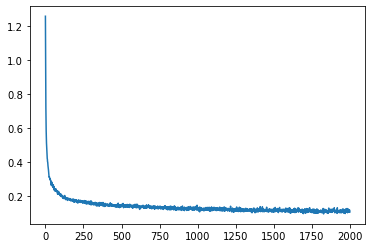

In [16]:
plt.plot(history.history['loss'])
plt.show()

In [17]:
x_test

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
382,-0.234112,2.282117,0.954001,-0.463810,-0.638287,-0.057462,-0.268691,-0.581064,0.076101,-0.535235,...,1.657116,-0.966823,2.004806,0.315929,0.957976,0.094497,1.243425,0.685005,1.766601,-0.524402
377,0.782061,1.506039,0.289704,-1.482116,-0.638287,-0.057462,-0.268691,-0.057589,-0.263557,-0.426521,...,1.118042,-1.203628,0.444411,0.994036,-0.458336,1.010176,0.922780,0.961504,-0.372980,1.112718
1549,1.595000,-0.822195,-0.203162,0.554496,-0.638287,-0.057462,-0.268691,0.814868,-1.056093,1.312904,...,-1.500317,1.841005,-0.224329,-1.040286,-0.458336,1.010176,1.179296,1.168879,-0.649055,-0.524402
1639,-0.335729,0.988654,-0.181733,-0.803245,0.712969,-0.057462,-0.268691,0.291394,0.302540,-0.535235,...,0.912680,-0.696189,0.834510,0.994036,-0.458336,0.399723,0.217363,0.339381,0.351716,-0.524402
1669,-2.368075,-0.046117,-0.181733,0.215061,-0.300473,-0.057462,-0.268691,0.989360,-0.489996,-0.535235,...,-0.139797,-0.053433,-0.391514,0.654983,-0.458336,-1.675816,-1.321731,-1.734363,0.075641,-2.161523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1.188530,-0.822195,-0.160304,-0.803245,-0.638287,-0.057462,-0.268691,-0.755555,0.415759,-0.535235,...,0.989691,-1.237457,0.110041,0.315929,0.957976,0.765994,0.794523,0.823255,-0.303962,1.112718
366,0.172357,-0.822195,0.203988,-0.803245,-0.638287,-0.057462,-0.268691,0.931196,-1.056093,2.726187,...,-1.602998,1.333566,-1.283168,-1.040286,-0.458336,-0.088639,0.089105,-0.075367,-0.649055,-0.524402
1562,1.086913,-0.046117,-0.203162,0.893932,-0.638287,-0.057462,-0.268691,-0.522900,-0.489996,-0.263450,...,-0.370829,0.623152,0.221498,-0.362178,-0.458336,1.193311,1.179296,1.238004,-0.441999,1.112718
998,-0.437346,1.506039,-0.203162,-0.124374,-0.638287,-0.057462,-0.268691,-1.337194,0.189320,-0.535235,...,-0.653201,0.690811,-0.280057,-1.040286,-0.458336,-0.271775,0.217363,-0.006243,-0.338471,-0.524402


In [18]:
y_test

382     1.0
377     1.0
1549    2.0
1639    1.0
1669    1.0
       ... 
80      1.0
366     2.0
1562    1.0
998     1.0
1239    1.0
Name: fetal_health, Length: 638, dtype: float64

In [19]:
test_predictions=model.predict(x_test)
test_predictions

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.1269035e-13, 1.0681432e-01, 8.9318568e-01, 2.2287129e-11],
       ...,
       [0.0000000e+00, 1.0000000e+00, 2.5278889e-13, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [20]:
pred_classes = model.predict_classes(x_test, verbose=0)
pred_classes

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 3, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 3, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1,

**CALCULATION OF F1 SCORE. **

In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred_classes, average=None)
f1

array([0.95686275, 0.6835443 , 0.81632653])

# CONFUSION MATRIX

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_classes)

array([[488,  19,   3],
       [ 19,  54,   5],
       [  3,   7,  40]])

# CLASSIFICATION REPORT

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred_classes, digits=3))

              precision    recall  f1-score   support

         1.0      0.957     0.957     0.957       510
         2.0      0.675     0.692     0.684        78
         3.0      0.833     0.800     0.816        50

    accuracy                          0.912       638
   macro avg      0.822     0.816     0.819       638
weighted avg      0.913     0.912     0.912       638



# MULTICLASS ROC CURVE

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


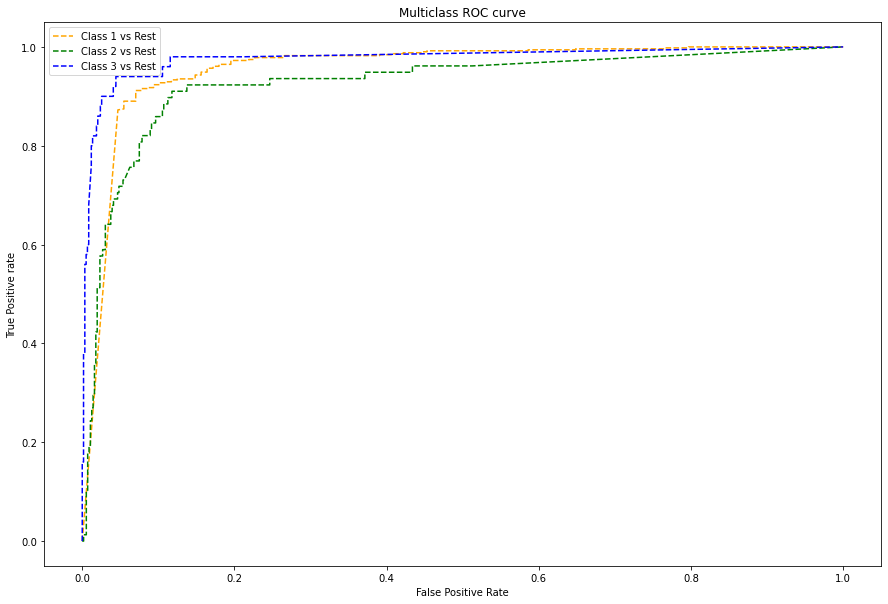

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_predictions[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize=(15,10))
plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


# ROC_AUC_SCORE

In [25]:
score = roc_auc_score(y_test, test_predictions, average='weighted', multi_class='ovo', labels=[0,1,2,3])
score

0.9512762474172212

# PRECISION RECALL CURVE

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


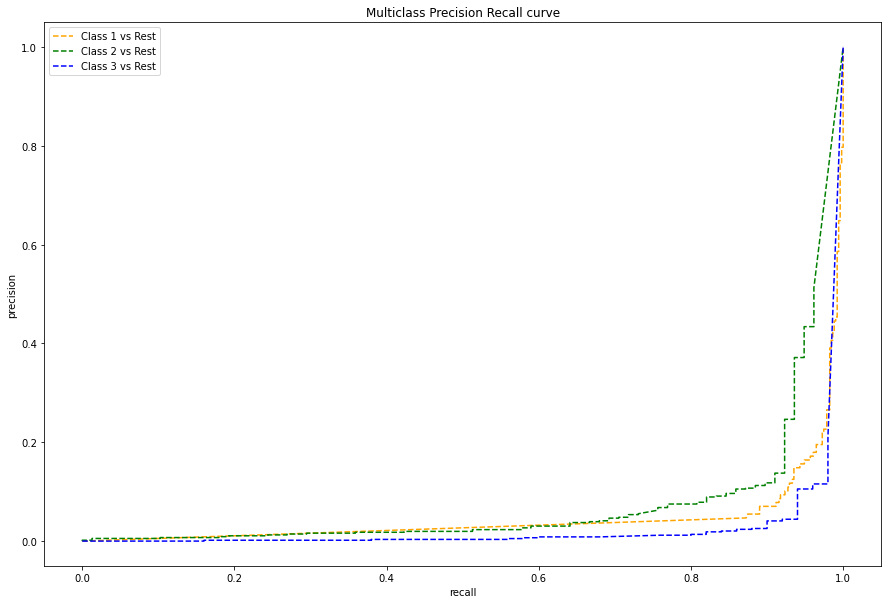

In [26]:
from sklearn.metrics import precision_recall_curve
precision = {}
recall = {}
thresh ={}
n_class = 4

for i in range(n_class):    
    precision[i], recall[i], thresh[i] = roc_curve(y_test, test_predictions[:,i], pos_label=i)
    
plt.figure(figsize=(15,10))
plt.plot(recall[1], precision[1],  linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(recall[2], precision[2],  linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(recall[3], precision[3],  linestyle='--',color='blue', label='Class 3 vs Rest') 
plt.title('Multiclass Precision Recall curve')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='upper left')   

In [27]:
from sklearn.metrics import recall_score
recall_score(y_test, pred_classes,  labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

0.9122257053291536